## 系统树状图(Dendrogram)： 层级-聚类

[scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

[dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
import seaborn as sns
# 新增
from scipy.cluster.hierarchy import dendrogram, linkage

## 简单例子和参数

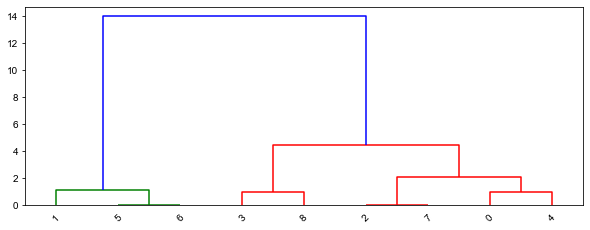

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0, 3]]

Z = linkage(X, method='ward', metric='euclidean')
fig = plt.figure(figsize=(8, 3))
ax=plt.gca()
dn = dendrogram(Z,leaf_rotation=45,leaf_font_size=10,ax=ax,orientation='top')

plt.tight_layout(pad=0.)

fname_fig=str('../../figures/Chapter3/Lecture3_5_basic1.pdf')
plt.savefig(fname_fig)
plt.show()

## 实例: 聚类分析

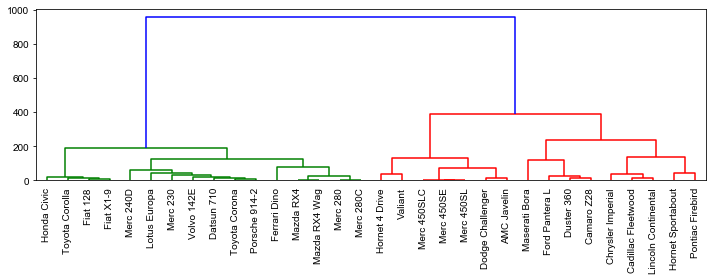

In [80]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df = data_cars.set_index('model')
del df.index.name
# print(df.values)
# clustermap=sns.clustermap(df, z_score=1,cmap='magma')  #dendrogram_row.linkage
# clusterdata=clustermap.data2d
# plt.close()

models=df.index
# values=np.array(clusterdata.values,dtype=float)
# # values_norm=values/values.max(axis=0)
# names=clusterdata.columns.values
# print(len(models),len(names),values.shape)

Z = linkage(df.values, method='ward', metric='euclidean')
# fig = plt.figure(figsize=(8, 5))
# ax=plt.gca()

fig=plt.figure(figsize=(10,4))
ax=plt.gca()
dn = dendrogram(Z,leaf_rotation=90,leaf_font_size=10,ax=ax,orientation='top')
leaves=np.array(dn['leaves'],dtype=int)
ax.xaxis.set_ticklabels(models[leaves])
plt.tight_layout()

fname_fig='../../figures/Chapter3/Lecture3_5_example1.pdf'
plt.savefig(fname_fig)

plt.show()


## 实例2： 聚类层级图+热图

- 可直接用绘图库 [seaborn](https://python-graph-gallery.com/seaborn/)库的[clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html)函数绘制。[举例](https://python-graph-gallery.com/404-dendrogram-with-heat-map/)

```python
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
# Normalize
sns.clustermap(df, z_score=1)

```

- 也可自己手动绘制: **这里主要介绍自己手动绘制的优点和技巧**

32 11 (32, 11)


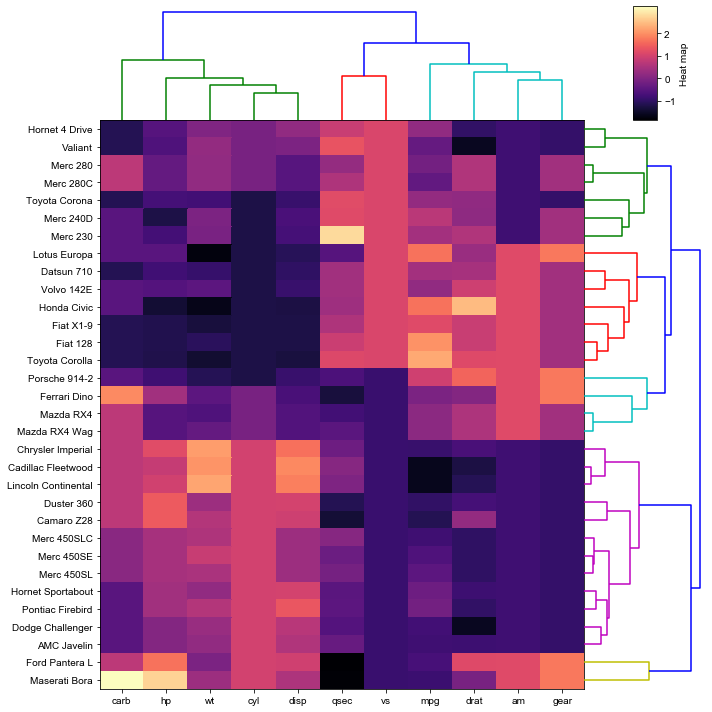

In [79]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df = data_cars.set_index('model')
del df.index.name
# 借助seaborn的函数计算聚类分析，如果喜欢也可直接用其绘图
clustermap=sns.clustermap(df, z_score=1,cmap='magma')  #dendrogram_row.linkage
clusterdata=clustermap.data2d
plt.close()

models=clusterdata.index
values=np.array(clusterdata.values,dtype=float)
# values_norm=values/values.max(axis=0)
names=clusterdata.columns.values
print(len(models),len(names),values.shape)

fig,axs=plt.subplots(2,2,gridspec_kw={"width_ratios":[1,0.25],"height_ratios":[0.2,1],"hspace":0,"wspace":0},figsize=(10,10))

# 1. 绘制热图
ax=axs[1][0]
x = np.arange(values.shape[1] + 1)
y = np.arange(values.shape[0] + 1)
# 第二种方式
heatmap=ax.pcolormesh(x,y,values,cmap='magma')
# set axes
ax.set_xlim(x.min(),x.max())
ax.set_xticks(x[:-1]+0.5)
ax.set_xticklabels(names)
ax.set_ylim(y.min(),y.max())
ax.set_yticks(y[:-1]+0.5)
ax.set_yticklabels(models)
ax.invert_yaxis()

# 2.1 聚类分析y方向即row方向的数据
ax=axs[1][1]
linkage_row=clustermap.dendrogram_row.linkage
dn = dendrogram(linkage_row,ax=ax,orientation='right')
ax.axis('off')
ax.invert_yaxis()
# 2.2 聚类分析x方向即col方向的数据
ax=axs[0][0]
linkage_row=clustermap.dendrogram_col.linkage
dn = dendrogram(linkage_row,ax=ax,orientation='bottom')
ax.axis('off')
ax.invert_yaxis()

# 3. colorbar
ax=axs[0][1]
w_cb=0.2
ax_cb=ax.inset_axes([0.5-w_cb/2,0,w_cb,1],transform=ax.transAxes)
cbar_kw=dict(ticks=np.arange(-3,3))
cbar = plt.colorbar(heatmap, cax=ax_cb,label='Heat map',**cbar_kw)
ax.axis('off')

# ------
plt.tight_layout()
fname_fig='../../figures/Chapter3/Lecture3_5_example2.pdf'
plt.savefig(fname_fig)

plt.show()